In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Integer, Real
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('preprocessed_final_url.csv')
df.head()

,url,result,created_year,created_month,created_day,created_hour,url_length,hostname_length,has_ip,special_char_sum,common_term_sum,digit_ratio,has_port,abnormal_tld_in_path,abnormal_subdomain,num_subdomains,has_prefix_suffix,is_shortened,has_suspicious_text,phish_word,brand_in_subdomain
0,http://intego3.info/EXEL/index.php,1,2021,2,17,20,34,12,0,7,2,0.029412,0,0,0,0,0,0,1,0,0
1,https://www.investopedia.com/terms/n/next-elev...,0,2021,11,1,12,52,20,0,10,4,0.000000,0,0,0,1,0,0,1,0,0
2,https://jobs.emss.org.uk/lcc.aspx,0,2021,2,17,18,33,16,0,8,2,0.000000,0,0,0,2,0,0,1,0,0
3,https://paribas-biznesplanet-logowanie.com,1,2020,12,21,23,42,34,0,6,3,0.000000,0,0,0,0,0,0,0,0,0
4,https://best-mac-tips.com/2014/08/14/changing-...,0,2021,10,31,18,82,17,0,18,3,0.097561,0,0,0,0,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59928 entries, 0 to 59927
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   59928 non-null  object 
 1   result                59928 non-null  int64  
 2   created_year          59928 non-null  int64  
 3   created_month         59928 non-null  int64  
 4   created_day           59928 non-null  int64  
 5   created_hour          59928 non-null  int64  
 6   url_length            59928 non-null  int64  
 7   hostname_length       59928 non-null  int64  
 8   has_ip                59928 non-null  int64  
 9   special_char_sum      59928 non-null  int64  
 10  common_term_sum       59928 non-null  int64  
 11  digit_ratio           59928 non-null  float64
 12  has_port              59928 non-null  int64  
 13  abnormal_tld_in_path  59928 non-null  int64  
 14  abnormal_subdomain    59928 non-null  int64  
 15  num_subdomains     

In [5]:
df = df.drop('url', axis=1);df

,result,created_year,created_month,created_day,created_hour,url_length,hostname_length,has_ip,special_char_sum,common_term_sum,digit_ratio,has_port,abnormal_tld_in_path,abnormal_subdomain,num_subdomains,has_prefix_suffix,is_shortened,has_suspicious_text,phish_word,brand_in_subdomain
0,1,2021,2,17,20,34,12,0,7,2,0.029412,0,0,0,0,0,0,1,0,0
1,0,2021,11,1,12,52,20,0,10,4,0.000000,0,0,0,1,0,0,1,0,0
2,0,2021,2,17,18,33,16,0,8,2,0.000000,0,0,0,2,0,0,1,0,0
3,1,2020,12,21,23,42,34,0,6,3,0.000000,0,0,0,0,0,0,0,0,0
4,0,2021,10,31,18,82,17,0,18,3,0.097561,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59923,1,2021,5,27,14,48,17,0,7,3,0.000000,0,0,0,0,0,0,0,0,0
59924,1,2020,12,17,23,245,14,0,18,3,0.334694,0,0,0,0,0,0,0,1,0
59925,0,2021,10,31,19,49,14,0,9,4,0.081633,0,0,0,1,0,0,0,0,0
59926,0,2021,10,31,17,44,23,0,10,4,0.022727,0,0,0,1,1,0,1,0,0


In [6]:
df.isnull().sum()

result                  0
created_year            0
created_month           0
created_day             0
created_hour            0
url_length              0
hostname_length         0
has_ip                  0
special_char_sum        0
common_term_sum         0
digit_ratio             0
has_port                0
abnormal_tld_in_path    0
abnormal_subdomain      0
num_subdomains          0
has_prefix_suffix       0
is_shortened            0
has_suspicious_text     0
phish_word              0
brand_in_subdomain      0
dtype: int64

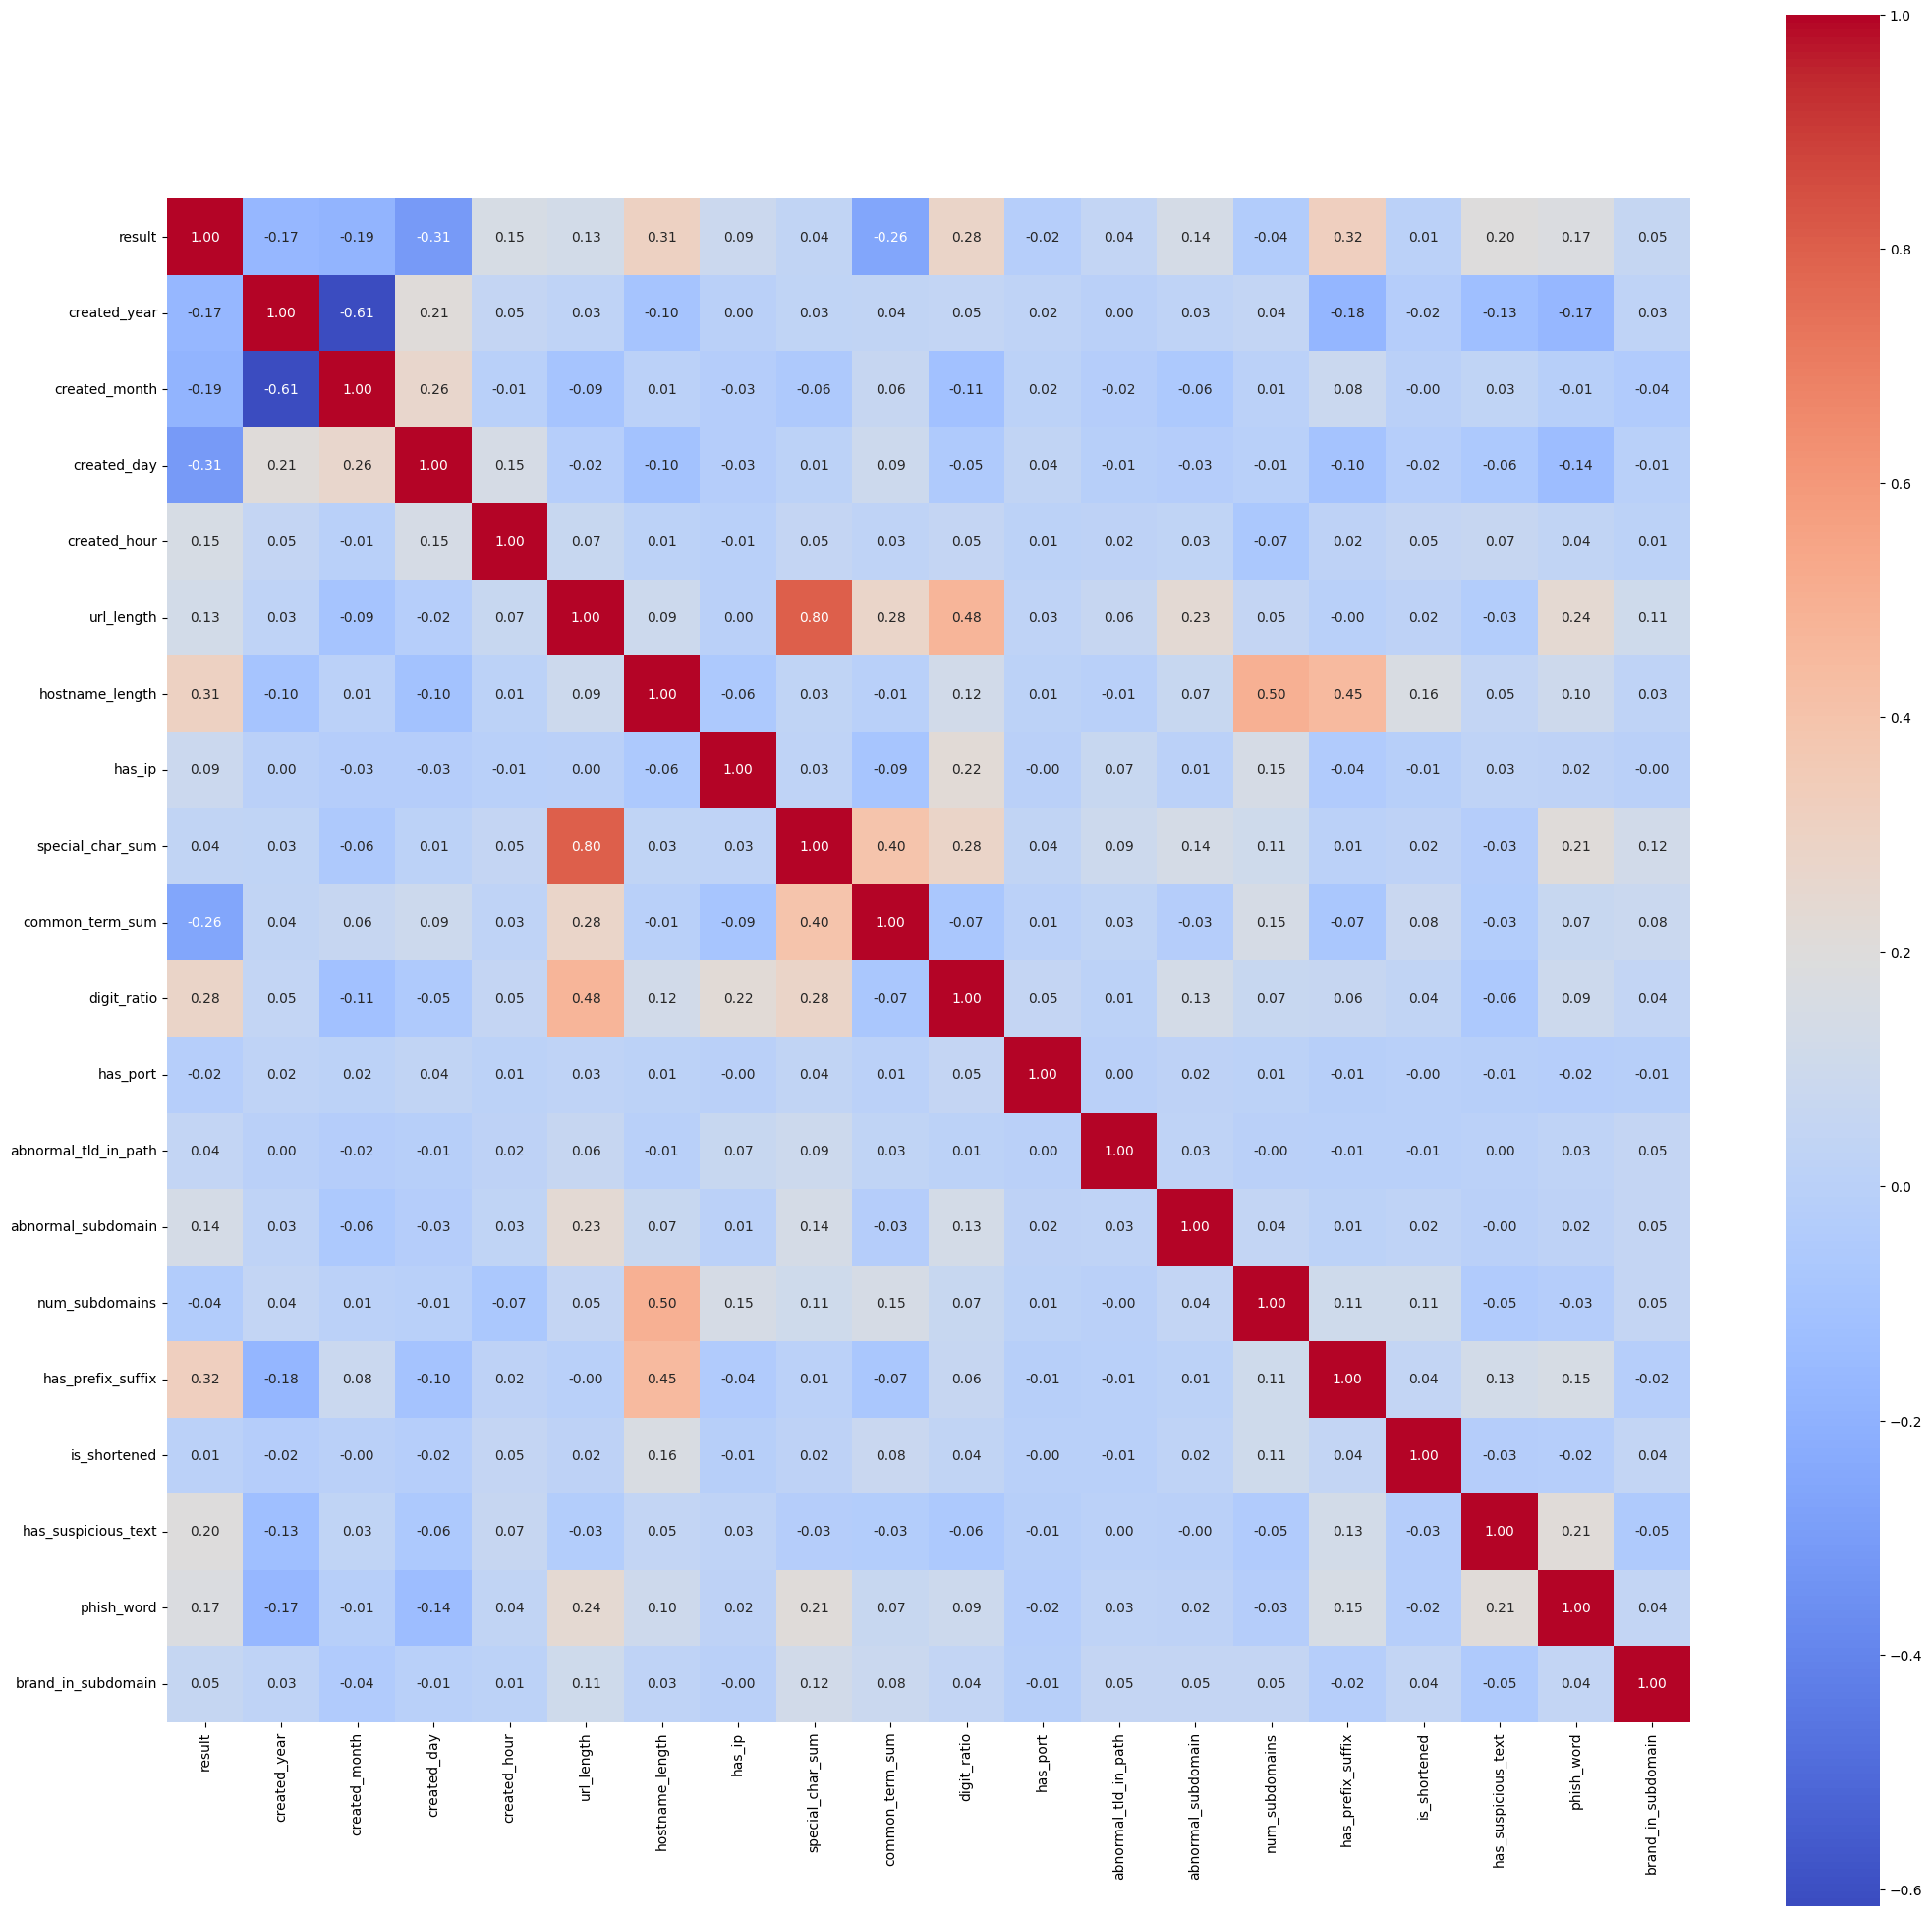

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.show()

In [8]:
threshold = 0.8

highly_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print(highly_corr_pairs)

# 처리 보류
# for pair in highly_corr_pairs:
#     feature_1, feature_2 = pair
#     interaction_column_name = f"{feature_1}_{feature_2}_interaction"
    
#     df[interaction_column_name] = df[feature_1] * df[feature_2]

[('special_char_sum', 'url_length')]


In [9]:
y.hist()

NameError: name 'y' is not defined

# 전처리

In [10]:
sc = StandardScaler()

# cat_cols = ['has_ip','is_https','has_punycode','has_port','abnormal_tld_in_path','abnormal_subdomain', 
            # 'has_prefix_suffix','is_shortened','has_suspicious_text','brand_in_subdomain']

num_cols = ['created_year','created_month','created_day','created_hour','url_length','hostname_length',
            'special_char_sum','common_term_sum','digit_ratio','num_subdomains']

df[num_cols] = sc.fit_transform(df[num_cols])

In [11]:
df

,result,created_year,created_month,created_day,created_hour,url_length,hostname_length,has_ip,special_char_sum,common_term_sum,digit_ratio,has_port,abnormal_tld_in_path,abnormal_subdomain,num_subdomains,has_prefix_suffix,is_shortened,has_suspicious_text,phish_word,brand_in_subdomain
0,1,0.519004,-1.331382,-0.343083,0.629637,-0.556008,-0.942997,0,-0.529145,-1.203708,-0.272124,0,0,0,-1.095854,0,0,1,0,0
1,0,0.519004,0.932644,-2.083074,-0.552166,-0.239232,-0.074558,0,-0.076499,0.992475,-0.583332,0,0,0,0.209396,0,0,1,0,0
2,0,0.519004,-1.331382,-0.343083,0.334186,-0.573607,-0.508777,0,-0.378263,-1.203708,-0.583332,0,0,0,1.514646,0,0,1,0,0
3,1,-1.926767,1.184203,0.091915,1.072813,-0.415218,1.445210,0,-0.680027,-0.105617,-0.583332,0,0,0,-1.095854,0,0,0,0,0
4,0,0.519004,0.681086,1.179409,0.334186,0.288729,-0.400223,0,1.130559,-0.105617,0.448968,0,0,0,-1.095854,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59923,1,0.519004,-0.576706,0.744411,-0.256715,-0.309626,-0.400223,0,-0.529145,-0.105617,-0.583332,0,0,0,-1.095854,0,0,0,0,0
59924,1,-1.926767,1.184203,-0.343083,1.072813,3.157313,-0.725887,0,1.130559,-0.105617,2.958087,0,0,0,-1.095854,0,0,0,1,0
59925,0,0.519004,0.681086,1.179409,0.481912,-0.292028,-0.725887,0,-0.227381,0.992475,0.280429,0,0,0,0.209396,0,0,0,0,0
59926,0,0.519004,0.681086,1.179409,0.186461,-0.380021,0.251106,0,-0.076499,0.992475,-0.342853,0,0,0,0.209396,1,0,1,0,0


# 모델링

In [12]:
y = df["result"]
X = df.drop(columns=["result"],axis=1)

- 교차검증

In [17]:
scoring = ['accuracy', 'f1', 'precision', 'recall']
model = GradientBoostingClassifier(n_estimators=10, random_state=42)
score = cross_validate(model, X, y, return_train_score=True, n_jobs=-1, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(score['test_accuracy']), np.mean(score['test_f1']), np.mean(score['test_precision']), np.mean(score['test_recall']))

model = RandomForestClassifier(n_estimators=10, random_state=42)
score = cross_validate(model, X, y, return_train_score=True, n_jobs=-1, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(score['test_accuracy']), np.mean(score['test_f1']), np.mean(score['test_precision']), np.mean(score['test_recall']))

model = ExtraTreesClassifier(n_estimators=10, random_state=42)
score = cross_validate(model, X, y, return_train_score=True, n_jobs=-1, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(score['test_accuracy']), np.mean(score['test_f1']), np.mean(score['test_precision']), np.mean(score['test_recall']))

model = DecisionTreeClassifier(random_state=42)
score = cross_validate(model, X, y, return_train_score=True, n_jobs=-1, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(score['test_accuracy']), np.mean(score['test_f1']), np.mean(score['test_precision']), np.mean(score['test_recall']))

0.9017154765666326 0.9025601460086689 0.8947537686779189 0.9105595379745439
0.9845147554639084 0.9845353362444899 0.9832261991735812 0.9858497018216846
0.9845814679774157 0.9845905029323763 0.9839691262772376 0.9852155173470072
0.984381245509554 0.9843724619141743 0.9849008785860413 0.9838472376651264


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((47942, 19), (47942,), (11986, 19), (11986,))

- 하이퍼파라미터 튜닝

In [20]:
#!pip install scikit-optimize

In [21]:
model = ExtraTreesClassifier(random_state=42)

param_space = {
    'n_estimators': Integer(50, 300),    
    'max_depth': Integer(5, 50), 
    'min_samples_split': Integer(2, 20),     
    'min_samples_leaf': Integer(1, 20),  
    'max_features': Real(0.1, 1.0, prior='uniform')  
}

In [23]:
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# bayes_search.best_params_

AttributeError: 'BayesSearchCV' object has no attribute 'best_params_'

In [25]:
bayes_search.fit(X_train, y_train)

print("Best Parameters:", bayes_search.best_params_)
print("Best CV Accuracy:", bayes_search.best_score_)

y_pred = bayes_search.best_estimator_.predict(X_test)


Best Parameters: OrderedDict([('max_depth', 47), ('max_features', 0.8578304751637759), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 300)])
Best CV Accuracy: 0.9896541684865295


In [28]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Test Accuracy: 0.9908226263974637
0.9931380753138075
0.9885057471264368
0.9908164969110035
